# Projeto (Parte 1)

Análise de dados da base https://www.kaggle.com/datasets/giovamata/airlinedelaycauses. 

- Dupla -> (Mauricio Benjamin da Rocha & Caio Bueno)
- Realizar uma análise descritiva por completo da base (Variáveis discretas e contínuas);
- Avaliar a distribuição de probabilidade de variáveis contínuas que considera mais interessante;

Entrega:
- Aguarde a parte 2.

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("DelayedFlights.csv")

In [5]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,...,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
df["Year"].unique()

array([2008])

In [10]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Verificando a origem e destino dos voos

In [14]:
df.Origin.value_counts()

Origin
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BLI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: count, Length: 303, dtype: int64

In [15]:
origem =  df.Origin.value_counts(normalize=True)
origem_not_normalized = df.Origin.value_counts()
print(origem.index)
type(origem)


Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW',
       ...
       'SUX', 'PLN', 'WYS', 'HTS', 'BJI', 'BLI', 'PIR', 'PUB', 'INL', 'TUP'],
      dtype='object', name='Origin', length=303)


pandas.core.series.Series

In [16]:
for idx in range(0,len(origem),1):
    print(f"{origem.index[idx]} == {origem[idx]}")

ATL == 0.06795531501612488
ORD == 0.06504633000096037
DFW == 0.04926480231397005
DEN == 0.03837495443416266
LAX == 0.030345556853256836
IAH == 0.029351627823403854
PHX == 0.028769727555017197
LAS == 0.02773191074982006
EWR == 0.027326594236347545
DTW == 0.022678620664016876
SFO == 0.022615628798228794
MCO == 0.01865953309602955
CLT == 0.01809983487869935
JFK == 0.017919636836403928
MSP == 0.016747575071330543
LGA == 0.016101650283618294
SEA == 0.016037109437523945
BWI == 0.015856395068459768
PHL == 0.015652962321570377
MDW == 0.015088100836552631
SLC == 0.014805670094043757
BOS == 0.01455834957181021
SAN == 0.01281936101464406
CVG == 0.012330399564633268
MIA == 0.012016472889230353
IAD == 0.011423729758699848
TPA == 0.010429284402078113
HOU == 0.010140141411575427
FLL == 0.009997635223399103
DAL == 0.009660473843402222
MEM == 0.009356357376605647
DCA == 0.009151891976178748
STL == 0.008946910248983095
OAK == 0.00879356119866292
BNA == 0.008517326377379104
CLE == 0.008466726354041134
MC

/tmp/ipykernel_5382/1116063119.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{origem.index[idx]} == {origem[idx]}")


In [17]:
rotulos = []
valores = []
porcentagens = []
for idx in range(0,len(origem),1):
    rotulos.append(origem.index[idx])
    porcentagens.append(round(origem[idx],2))
    valores.append(origem_not_normalized[idx])
    

#print(len(rotulos))
#print(len(porcentagens))

/tmp/ipykernel_5382/1402156336.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagens.append(round(origem[idx],2))
/tmp/ipykernel_5382/1402156336.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valores.append(origem_not_normalized[idx])


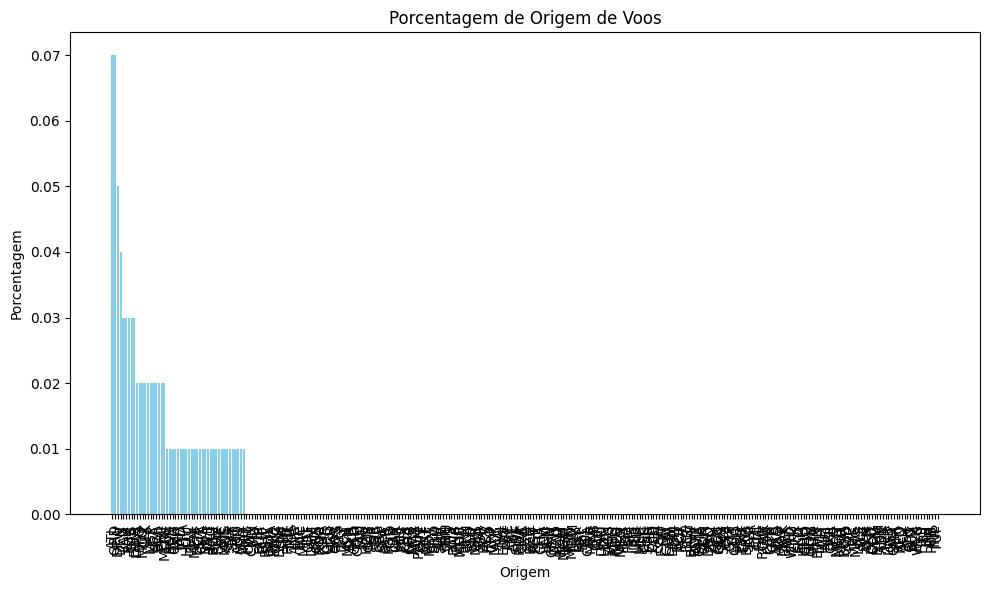

In [18]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(rotulos, porcentagens, color='skyblue')
plt.xlabel('Origem')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Origem de Voos')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


<Axes: >

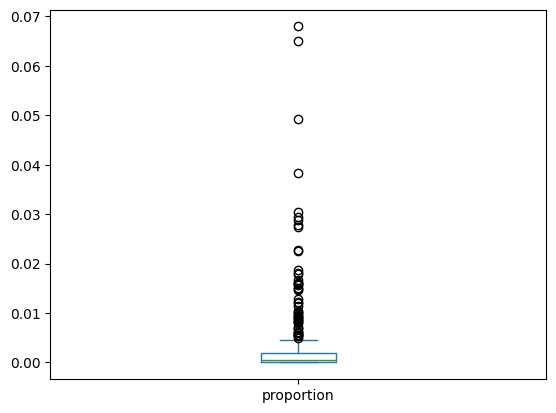

In [19]:
origem.plot.box()

In [20]:

#fig = px.box(df,y="Origin")

#fig.show()

# vamos análisar nossos dados

In [21]:
df["Origin"].describe(include="all")

count     1936758
unique        303
top           ATL
freq       131613
Name: Origin, dtype: object

In [22]:
teste = df.Origin.value_counts()
print(teste)
print(teste.value_counts().unique())
teste.describe
#.astype(float).describe()

Origin
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BLI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: count, Length: 303, dtype: int64
[2 1]


<bound method NDFrame.describe of Origin
ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BLI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: count, Length: 303, dtype: int64>

In [23]:
type(df["Origin"])
valores = sorted(valores)

# Análise Basica

In [24]:

print(f"Média: {np.mean(valores):.2f}\nModa: {np.argmax(np.bincount(valores))}\nMediana: {np.median(valores)}\nDesvio Padrão: {np.std(valores):.2f}\nMaximo: {np.max(valores)}\nMinimo: {np.min(valores)}")



Média: 6391.94
Moda: 1
Mediana: 905.0
Desvio Padrão: 15706.28
Maximo: 131613
Minimo: 1


# Análise InterQuantil

In [25]:
print("q1 (primeiro quartil) = ", np.quantile(valores, 0.25))
print("q2 (segundo quartil) = ", np.quantile(valores, 0.5))
print("q3 (terceiro quartil) = ", np.quantile(valores, 0.75))

q1 (primeiro quartil) =  262.0
q2 (segundo quartil) =  905.0
q3 (terceiro quartil) =  3652.0


In [26]:
teste.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count       303.000000
mean       6391.940594
std       15732.264519
min           1.000000
10%          89.800000
20%         207.800000
30%         343.600000
40%         561.400000
50%         905.000000
60%        1593.800000
70%        2922.800000
80%        6095.600000
90%       18041.800000
max      131613.000000
Name: count, dtype: float64

# Intervalo InterQuartil (IQR)

In [27]:
q1 = np.quantile(valores, 0.25)
q3 = np.quantile(valores, 0.75)

IQR = q3 - q1

print("Distancia interquartilica = ", IQR)

Distancia interquartilica =  3390.0


# Destribuição Amostral

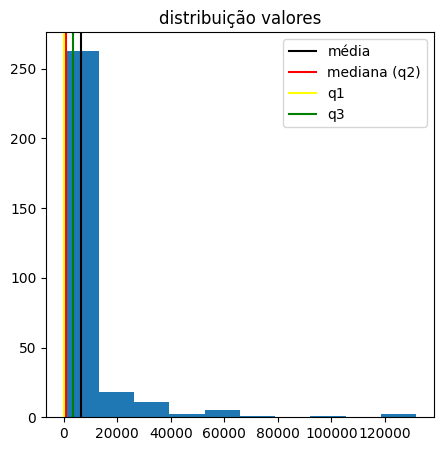

In [28]:
fig, ax = plt.subplots(figsize = (5,5))
ax.hist(valores, bins = 10)
ax.set_title("distribuição valores")
ax.axvline(x = teste.mean(), color= 'black', label = "média")
ax.axvline(x = np.median(valores), color= 'red', label = "mediana (q2)")
ax.axvline(x = np.quantile(valores, 0.25), color= 'yellow', label = "q1")
ax.axvline(x = np.quantile(valores, 0.75), color= 'green', label = "q3")
ax.legend()

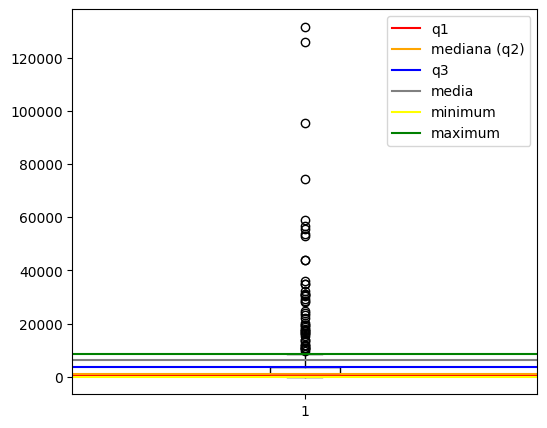

In [29]:
# resolvido (salve pro Alan)

fig, ax = plt.subplots(figsize = (6,5))

q1 = np.quantile(valores, 0.25)
q3 = np.quantile(valores, 0.75)
iqr = q3 - q1

minimum = q1 - (1.5 * iqr)
minimum_2 = np.max([np.min(valores), minimum])

maximum = q3 + (1.5 * iqr)
maximum_2 = np.min([np.max(valores), maximum])

ax.boxplot(valores)
ax.axhline(y = q1, label ="q1", color ="red" )
ax.axhline(y = np.median(valores), label = "mediana (q2)", color= "orange")
ax.axhline(y = q3, label ="q3", color ="blue" )
ax.axhline(y = teste.mean(), label ="media", color ="gray")
ax.axhline(y = minimum_2, label ="minimum", color = "yellow" )
ax.axhline(y = maximum_2, label ="maximum", color = "green" )
ax.legend()
ax = ax 

In [30]:
valores.count(1)

2

(array([263.,  18.,  11.,   2.,   5.,   1.,   0.,   1.,   0.,   2.]),
 array([1.000000e+00, 1.316220e+04, 2.632340e+04, 3.948460e+04,
        5.264580e+04, 6.580700e+04, 7.896820e+04, 9.212940e+04,
        1.052906e+05, 1.184518e+05, 1.316130e+05]),
 <BarContainer object of 10 artists>)

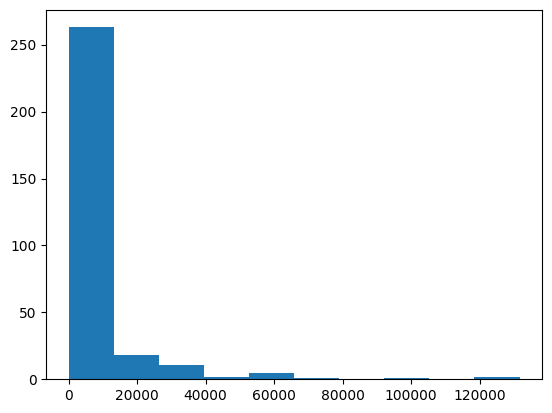

In [31]:
plt.hist(valores)

# Amplitude

In [32]:
valores_ordenados = sorted(valores)

print(f"Maior Valor = {valores_ordenados[-1]}\nMenor valor = {valores_ordenados[0]}\nAmplitude = {valores_ordenados[-1] - valores_ordenados[0]}")

Maior Valor = 131613
Menor valor = 1
Amplitude = 131612


# Variância

In [33]:
print("Variância = ",np.var(valores_ordenados))

Variância =  246687301.5410254


# Heatmap

In [34]:
mpg = df.select_dtypes(include = np.number)
mpg

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,1631,127.0,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,1631,162.0,...,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,...,533,13.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlação de spearman')

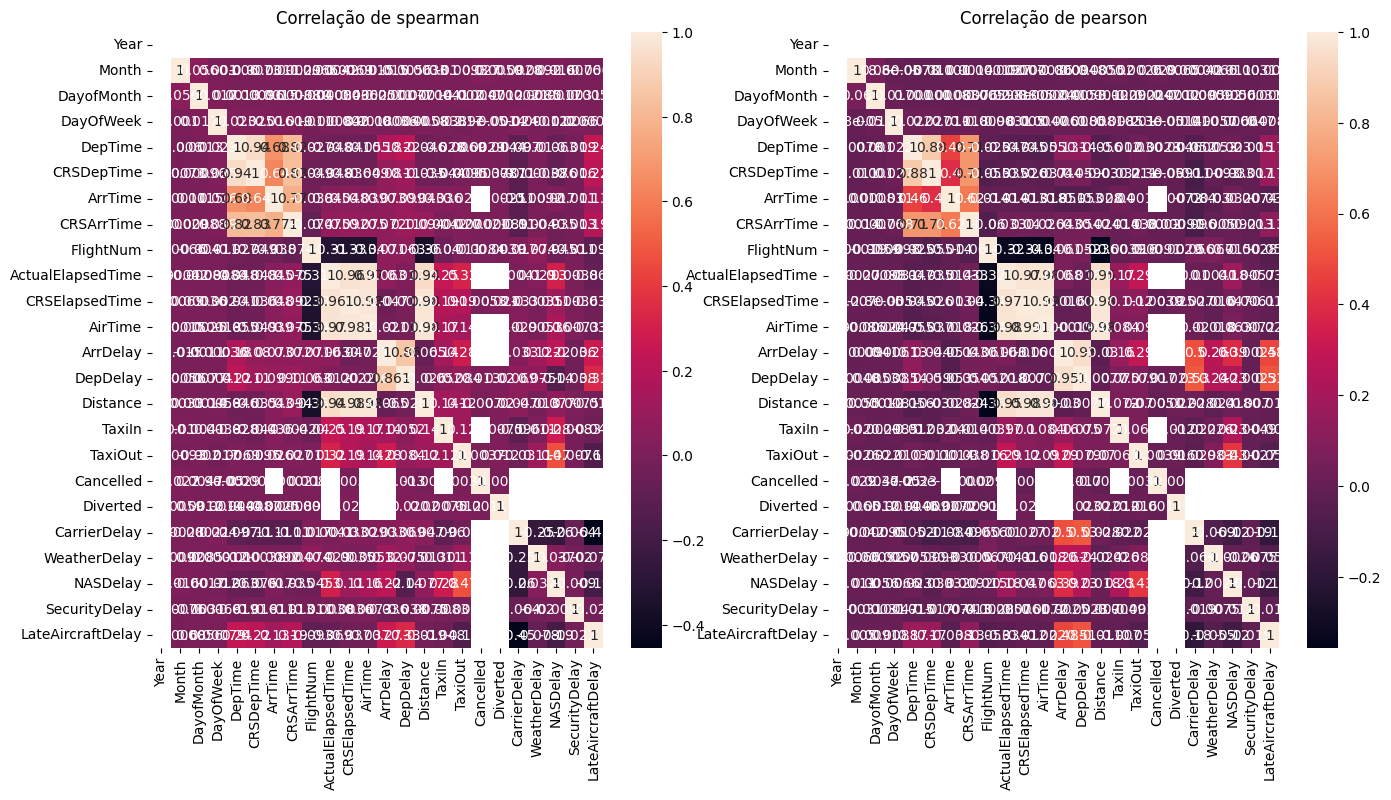

In [35]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(mpg.corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(mpg.corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

In [36]:
o = df["Origin"]
d = df["Dest"]


In [37]:
o

0          IAD
1          IAD
2          IND
3          IND
4          IND
          ... 
1936753    MSP
1936754    RIC
1936755    ATL
1936756    IAD
1936757    SAT
Name: Origin, Length: 1936758, dtype: object

In [38]:
d

0          TPA
1          TPA
2          BWI
3          BWI
4          JAX
          ... 
1936753    ATL
1936754    ATL
1936755    IAH
1936756    ATL
1936757    ATL
Name: Dest, Length: 1936758, dtype: object

# para usar um heatmap precisamos padronizar nossos dados de string para inteiro

In [39]:
ids_0 = [i for i in o]
ids_0

['IAD',
 'IAD',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'IND',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'ISP',
 'JAN',
 'JAN',
 'JAN',
 'JAN',
 'JAN',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'JAX',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',
 'LAS',


In [40]:
ids_o = []
for string in o:
    key = ''
    for char in string:
        key += str(ord(char))
        
    ids_o.append(int(key))
    
ids_o

[736568,
 736568,
 737868,
 737868,
 737868,
 737868,
 737868,
 737868,
 737868,
 737868,
 737868,
 737868,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 738380,
 746578,
 746578,
 746578,
 746578,
 746578,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 746588,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 766583,
 

In [41]:
ids_1 = [i for i in d]
ids_1

['TPA',
 'TPA',
 'BWI',
 'BWI',
 'JAX',
 'LAS',
 'MCO',
 'MCO',
 'MDW',
 'PHX',
 'PHX',
 'TPA',
 'BWI',
 'BWI',
 'BWI',
 'BWI',
 'BWI',
 'FLL',
 'FLL',
 'MCO',
 'MCO',
 'MCO',
 'MCO',
 'MDW',
 'MDW',
 'MDW',
 'PBI',
 'PBI',
 'PBI',
 'RSW',
 'TPA',
 'TPA',
 'BWI',
 'HOU',
 'HOU',
 'MCO',
 'MDW',
 'BHM',
 'BNA',
 'BNA',
 'FLL',
 'FLL',
 'HOU',
 'IND',
 'PHL',
 'PHL',
 'TPA',
 'TPA',
 'TPA',
 'ABQ',
 'ABQ',
 'ABQ',
 'ABQ',
 'ALB',
 'AMA',
 'AUS',
 'AUS',
 'AUS',
 'BDL',
 'BNA',
 'BNA',
 'BNA',
 'BOI',
 'BUF',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BUR',
 'BWI',
 'BWI',
 'CLE',
 'CMH',
 'CMH',
 'DEN',
 'DEN',
 'DEN',
 'DEN',
 'DEN',
 'DEN',
 'ELP',
 'ELP',
 'GEG',
 'GEG',
 'HOU',
 'HOU',
 'HOU',
 'HOU',
 'IAD',
 'IND',
 'IND',
 'ISP',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LAX',
 'LBB',
 'LIT',
 'MAF',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCI',
 'MCO',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MDW',
 'MHT',
 'MSY',


In [42]:
ids_d = []
for string in d:
    key = ''
    for char in string:
        key += str(ord(char))
        
    ids_d.append(int(key))
    
ids_d

[848065,
 848065,
 668773,
 668773,
 746588,
 766583,
 776779,
 776779,
 776887,
 807288,
 807288,
 848065,
 668773,
 668773,
 668773,
 668773,
 668773,
 707676,
 707676,
 776779,
 776779,
 776779,
 776779,
 776887,
 776887,
 776887,
 806673,
 806673,
 806673,
 828387,
 848065,
 848065,
 668773,
 727985,
 727985,
 776779,
 776887,
 667277,
 667865,
 667865,
 707676,
 707676,
 727985,
 737868,
 807276,
 807276,
 848065,
 848065,
 848065,
 656681,
 656681,
 656681,
 656681,
 657666,
 657765,
 658583,
 658583,
 658583,
 666876,
 667865,
 667865,
 667865,
 667973,
 668570,
 668582,
 668582,
 668582,
 668582,
 668582,
 668582,
 668582,
 668582,
 668582,
 668773,
 668773,
 677669,
 677772,
 677772,
 686978,
 686978,
 686978,
 686978,
 686978,
 686978,
 697680,
 697680,
 716971,
 716971,
 727985,
 727985,
 727985,
 727985,
 736568,
 737868,
 737868,
 738380,
 766588,
 766588,
 766588,
 766588,
 766588,
 766588,
 766588,
 766588,
 766588,
 766666,
 767384,
 776570,
 776773,
 776773,
 776773,
 

In [43]:
delay =  df[["ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
rota =  pd.DataFrame({'Origem': ids_o, 'Destino': ids_d})

travel = pd.concat([rota,delay],axis=1)



In [44]:
rota

,Origem,Destino
0,736568,848065
1,736568,848065
2,737868,668773
3,737868,668773
4,737868,746588
...,...,...
1936753,778380,658476
1936754,827367,658476
1936755,658476,736572
1936756,736568,658476


In [45]:
travel

,Origem,Destino,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,736568,848065,-14.0,8.0,NaN,NaN,NaN,NaN,NaN
1,736568,848065,2.0,19.0,NaN,NaN,NaN,NaN,NaN
2,737868,668773,14.0,8.0,NaN,NaN,NaN,NaN,NaN
3,737868,668773,34.0,34.0,2.0,0.0,0.0,0.0,32.0
4,737868,746588,11.0,25.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1936753,778380,658476,25.0,30.0,3.0,0.0,0.0,0.0,22.0
1936754,827367,658476,75.0,57.0,0.0,57.0,18.0,0.0,0.0
1936755,658476,736572,99.0,80.0,1.0,0.0,19.0,0.0,79.0
1936756,736568,658476,9.0,11.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlação de spearman')

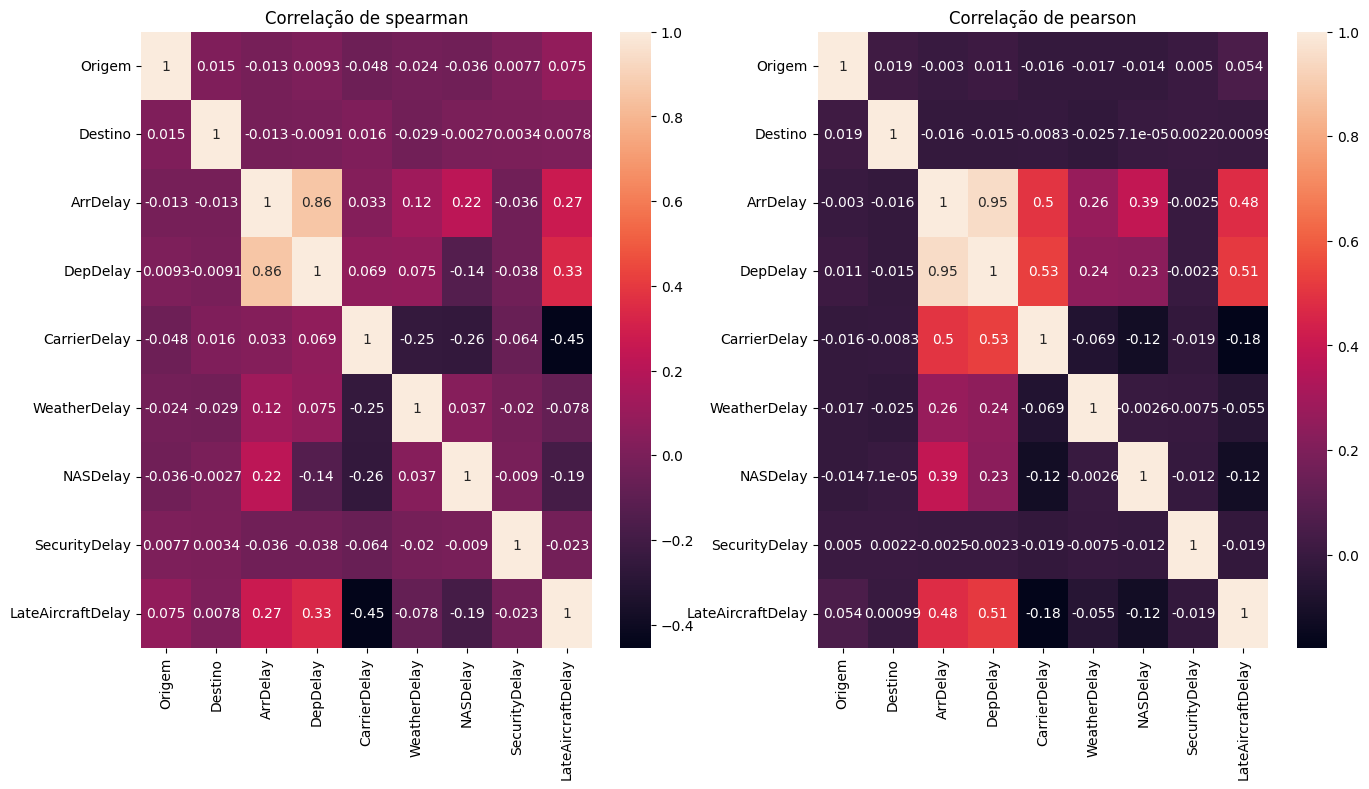

In [46]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(travel.corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(travel.corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

In [47]:
travel.fillna(0,inplace=True)
travel

,Origem,Destino,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,736568,848065,-14.0,8.0,0.0,0.0,0.0,0.0,0.0
1,736568,848065,2.0,19.0,0.0,0.0,0.0,0.0,0.0
2,737868,668773,14.0,8.0,0.0,0.0,0.0,0.0,0.0
3,737868,668773,34.0,34.0,2.0,0.0,0.0,0.0,32.0
4,737868,746588,11.0,25.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1936753,778380,658476,25.0,30.0,3.0,0.0,0.0,0.0,22.0
1936754,827367,658476,75.0,57.0,0.0,57.0,18.0,0.0,0.0
1936755,658476,736572,99.0,80.0,1.0,0.0,19.0,0.0,79.0
1936756,736568,658476,9.0,11.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Correlação de spearman')

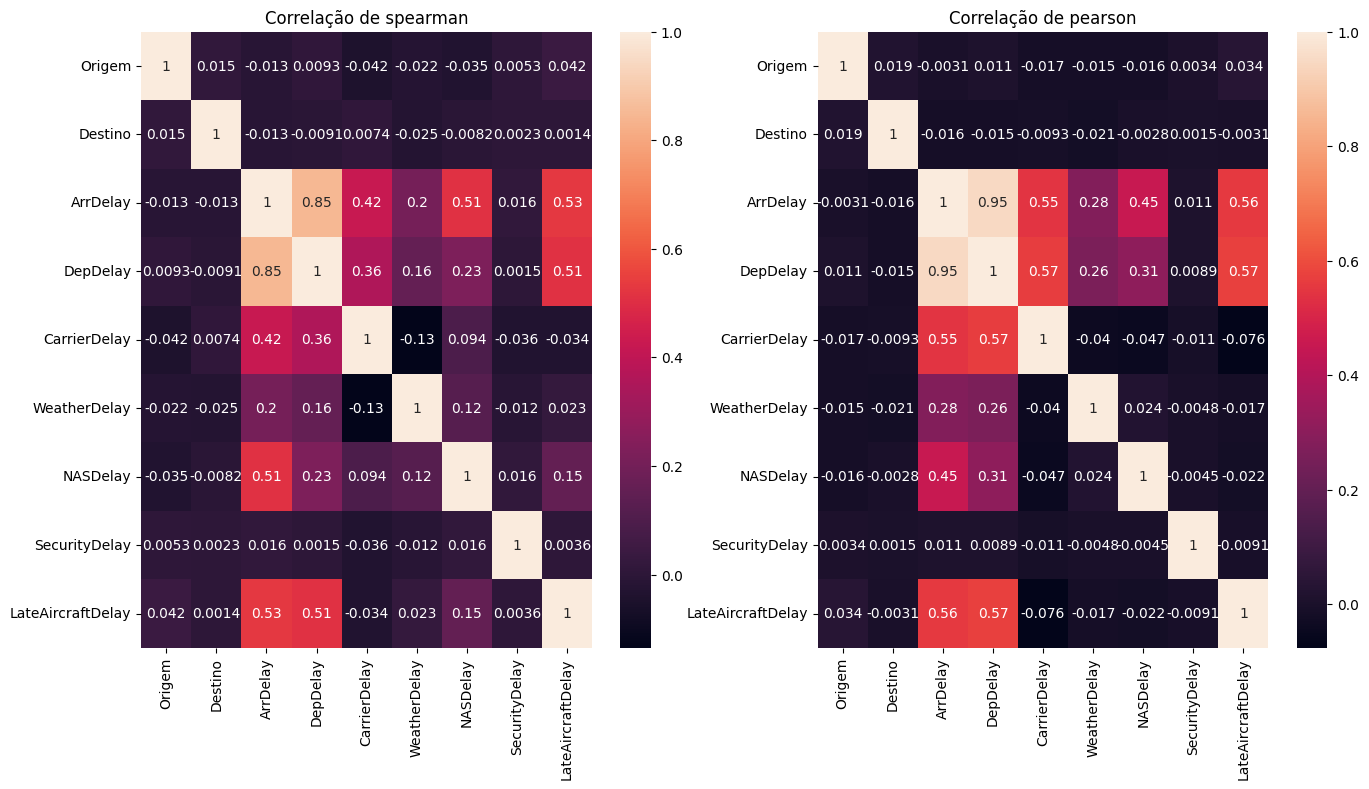

In [48]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(travel.corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(travel.corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

In [49]:
origens = df.Origin.value_counts()

origens["JFK"]

34706

In [50]:
df.Dest.value_counts()

Dest
ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
        ...  
INL         9
PIR         3
CYS         1
OGD         1
TUP         1
Name: count, Length: 304, dtype: int64

In [51]:
"""
Após uma breve análise percebemos que todos os dados são de 2018 e temos dados de todos os meses do ano
Vamos estar trabalhando com a ideia de análisar a quantidade de cancelamentos de voos e se conseguimos prever quando acontecerá um maior cancelamentos em nossos voos.
Vamos análisar em cima de meses, dias (1,2...31), semanas(segunda, terça...domingo)
""" 
fly = df[["Month","DayofMonth","DayOfWeek","Cancelled"]]

In [52]:
fly.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Cancelled'], dtype='object')

In [53]:
fly.head

<bound method NDFrame.head of          Month  DayofMonth  DayOfWeek  Cancelled
0            1           3          4          0
1            1           3          4          0
2            1           3          4          0
3            1           3          4          0
4            1           3          4          0
...        ...         ...        ...        ...
1936753     12          13          6          0
1936754     12          13          6          0
1936755     12          13          6          0
1936756     12          13          6          0
1936757     12          13          6          0

[1936758 rows x 4 columns]>

In [54]:
fly.Cancelled.unique()

array([0, 1])

In [55]:
sorted(fly.DayofMonth.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [56]:
sorted(fly.DayOfWeek.unique())

[1, 2, 3, 4, 5, 6, 7]

In [57]:
fly.describe()

,Month,DayofMonth,DayOfWeek,Cancelled
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,3.268348e-04
std,3.482546e+00,8.776272e+00,1.995966e+00,1.807562e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,1.000000e+00


In [58]:
#Análise total sobre o fato do voo ter sido cancelado ou não
fly.Cancelled.value_counts()

Cancelled
0    1936125
1        633
Name: count, dtype: int64

In [59]:
#Análise percentual sobre o fato do voo ter sido cancelado ou não
fly.Cancelled.value_counts(normalize=True)

Cancelled
0    0.999673
1    0.000327
Name: proportion, dtype: float64

In [60]:
type(fly.Cancelled.value_counts())

pandas.core.series.Series

In [61]:
porcentagens = (fly.Cancelled.value_counts(normalize=True)) * 100 
porcentagens = [porcentagens[0],porcentagens[1]]
porcentagens

[99.96731651553782, 0.032683484462178544]

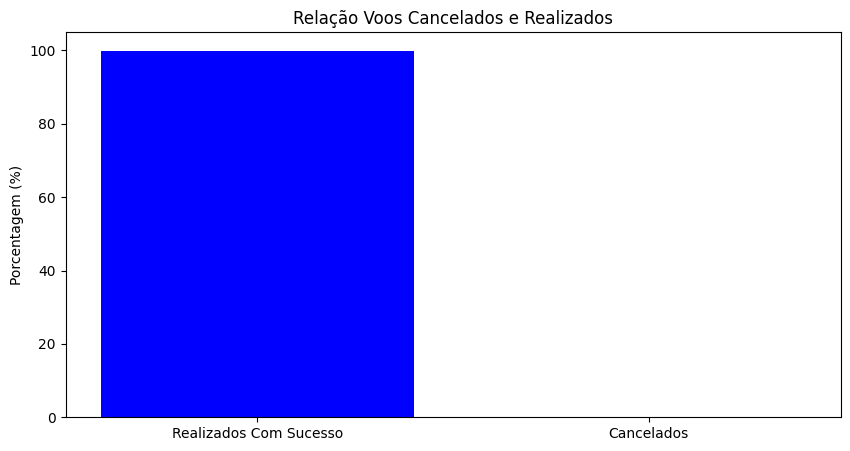

In [62]:


rotulos = ["Realizados Com Sucesso", "Cancelados"]

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 5))

# Usando porcentagens no eixo y
ax.bar(rotulos, porcentagens, label="Total de Voos", color=['blue', 'red'])

# Adicionando rótulos e título
ax.set_title("Relação Voos Cancelados e Realizados")
ax.set_ylabel("Porcentagem (%)")


plt.show()

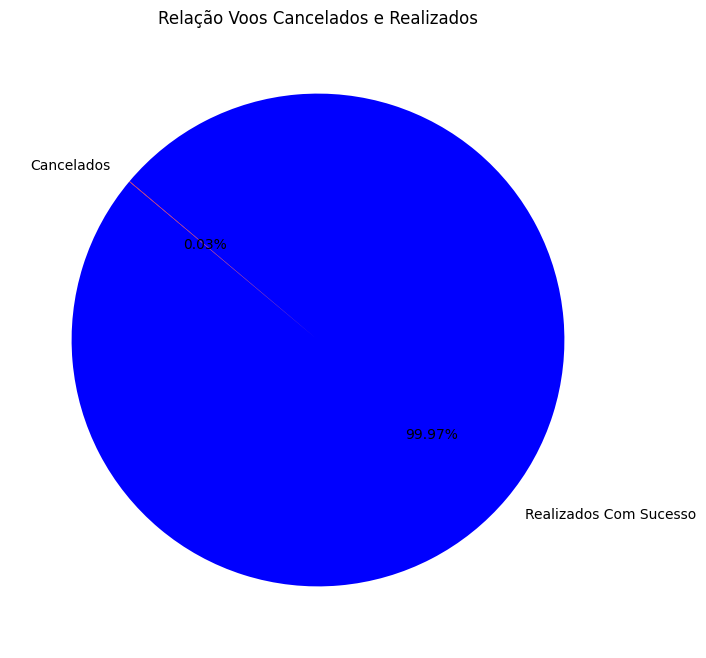

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(porcentagens, labels=rotulos, autopct='%1.2f%%', startangle=140, colors=['blue', 'red'])

ax.set_title("Relação Voos Cancelados e Realizados")

plt.show()


# Valor esperado para um voo e variancia 

In [64]:
# Vetor de eventos para voo cancelado, 0 - voo realizado com sucesso, 1 - voo cancelado
X = [0,1]

#calculo da porcentagem de ocorrencia de cada envento
porcentagens = df.Cancelled.value_counts(normalize=True)
porcentagens = [porcentagens[0],porcentagens[1]]

# Vetor de probabilidade
P = porcentagens #

# Valor esperado
esp   = np.dot(X, P)

# print do valor esperado
print("Valor esperado: ", np.round(esp, 2))

#Variância
var = np.round(np.dot(np.power(X, 2), P) - np.power(esp, 2), 2)

# print da variância
print("Variância:      ", np.dot(np.power(X, 2), P) - np.power(esp, 2))

# print da variância
print("Variância:      ", var)

Valor esperado:  0.0
Variância:       0.00032672802360612653
Variância:       0.0


# Probabilidade de em 100 novos voos eles terem sucesso ou falha

In [65]:
# Vetor de eventos para voo cancelado, 0 - voo realizado com sucesso, 1 - voo cancelado
X = [0,1]

#calculo da porcentagem de ocorrencia de cada envento
porcentagens = df.Cancelled.value_counts(normalize=True)
porcentagens = [porcentagens[0],porcentagens[1]]

print("Porcentage de sucesso = ",porcentagens[0])
print("Porcentage de Fracasso = ",porcentagens[1])
# Vetor de probabilidade
P = porcentagens[1] # chance do voo fracassar

#criando uma amostra aleatória uniformr que começa em 0 e vai até 1 com 100 elementos
amostra = np.random.uniform(0, 1, 100) 

resultados = np.where(amostra < P, "Cancelado", "Realizado")

print("Resultado = ",resultados)


Porcentage de sucesso =  0.9996731651553782
Porcentage de Fracasso =  0.00032683484462178546
Resultado =  ['Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado' 'Realizado'
 'Realizado' 'Real

In [66]:
pd.Series(resultados).value_counts()

Realizado    100
Name: count, dtype: int64

In [67]:
pd.Series(resultados).value_counts(normalize=True)

Realizado    1.0
Name: proportion, dtype: float64

# em 100 tentantivas, estima-se que 100% dos casos serão de sucesso

# e se fosse em 100.000 tentativas?

In [68]:
# Vetor de eventos para voo cancelado, 0 - voo realizado com sucesso, 1 - voo cancelado
X = [0,1]

#calculo da porcentagem de ocorrencia de cada envento
porcentagens = df.Cancelled.value_counts(normalize=True)
porcentagens = [porcentagens[0],porcentagens[1]]

print("Porcentage de sucesso = ",porcentagens[0])
print("Porcentage de Fracasso = ",porcentagens[1])
# Vetor de probabilidade
P = porcentagens[1] # chance do voo fracassar

#criando uma amostra aleatória uniform que começa em 0 e vai até 1 com 100 elementos
amostra = np.random.uniform(0, 1, 100_000) 

resultados = np.where(amostra < P, "Cancelado", "Realizado")

print("Resultado = ",resultados)


Porcentage de sucesso =  0.9996731651553782
Porcentage de Fracasso =  0.00032683484462178546
Resultado =  ['Realizado' 'Realizado' 'Realizado' ... 'Realizado' 'Realizado'
 'Realizado']


In [69]:
pd.Series(resultados).value_counts()

Realizado    99971
Cancelado       29
Name: count, dtype: int64

In [70]:
pd.Series(resultados).value_counts(normalize=True)

Realizado    0.99971
Cancelado    0.00029
Name: proportion, dtype: float64

# Nesse caso nossa taxa de sucesso seria de 99.96%.

 A Chance de um voo ser cancelado é minima

# Quais fatores influenciam eu voo atrasar?

In [71]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [72]:
# vamos analisar algumas variaveis que podem gerar atrasos para a decolagem

In [73]:
delay = df[["ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]

In [74]:
result = df.Cancelled
result

0          0
1          0
2          0
3          0
4          0
          ..
1936753    0
1936754    0
1936755    0
1936756    0
1936757    0
Name: Cancelled, Length: 1936758, dtype: int64

In [75]:
for column in delay.columns:
    print(f"\nColuna {column}:\n",delay[column].value_counts().unique())



Coluna ArrDelay:
 [36291 35902 35869 35782 35522 35490 34927 34517 34173 33528 33379 32476
 32157 31198 30288 30138 29816 28658 28644 28252 27203 27040 26038 25640
 24600 24025 23714 23233 22225 21628 21198 20791 20545 19465 18738 18597
 18279 17582 17517 16603 16274 16079 15468 15169 14776 14283 14206 13570
 13433 12866 12863 12552 12373 12024 11586 11230 11196 10949 10649 10369
 10293  9924  9873  9410  9310  9081  8986  8744  8653  8371  8267  7969
  7898  7830  7745  7446  7176  7112  6858  6793  6699  6574  6486  6461
  6176  6145  6001  5773  5753  5698  5663  5618  5390  5286  5265  5183
  5059  4835  4762  4704  4678  4576  4491  4489  4240  4228  4217  4104
  4027  3961  3895  3797  3776  3745  3652  3590  3451  3427  3426  3418
  3316  3201  3137  3126  3095  3065  2997  2984  2910  2796  2755  2671
  2647  2636  2573  2549  2534  2506  2491  2406  2388  2367  2339  2300
  2200  2121  2097  2095  2083  2025  2001  1992  1983  1925  1849  1845
  1828  1819  1812  1811  1712  

In [76]:
# Essas colunas em atrasos possuem correlação com a chance de sucesso ou falha em um voo?
# se sim, quão correlacionados estão?